In [1]:
#uncomment and run to install spacy
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

In [32]:
import pandas as pd
import networkx as nx
from textblob import TextBlob
import spacy
nlp = spacy.load('en_core_web_sm')

We would like to understand the relationships between different topics and concepts in the text below. We will combine text analytics and network analytics.

- Using sentence segmentation, break the text to sentences.
- Using named entity extraction, identify named entities in each sentence.
- Create a newtork in which the nodes are named entities and the links are whether the two named entities co-occured in same sentences. Add the frequency of co-occurences as an edge property.
- What is the most frequent relation in the data?
- What are the top five influential nodes?
- Plot the network, any insights?

In [4]:
article = """Moulton says Biden was wrong to vote in favor of Iraq War resolution in 2002

Updated 1:05 PM ET, Sun June 2, 2019
Washington (CNN) - Former Vice President Joe Biden was wrong to vote in favor of authorizing the use of military force against Iraq in 2002 when he was a senator, Democratic presidential candidate and Iraq War veteran Seth Moulton said in an interview that aired Sunday.

"It was a mistake. Because we should've been a lot more careful about going into Iraq. We should have questioned the intelligence. We should have made sure that we exhausted every opportunity before we put young American lives in danger," Moulton, who represents Massachusetts in the House, told CNN's Jake Tapper on "State of the Union" when pressed about Biden's decision to vote in favor of the US going to war in Iraq.

Biden, who is also a Democratic presidential candidate, has faced criticism for his support of the war, though he later became a vocal critic of the conflict. In 2002, then a senator from Delaware, Biden voted in favor of the Iraq War resolution, which authorized President George W. Bush to attack Iraq if Saddam Hussein refused to give up weapons of mass destruction as required by UN resolutions. The Senate passed the resolution in a 77-23 vote, with support from both sides of the aisle.

The intelligence used by the Bush administration that claimed Iraq possessed weapons of mass destruction has since been discredited, and support for the war has declined in the years since it began.

CNN has reached out to the Biden campaign for comment.

Moulton is not alone in his criticism of Biden's support for the Iraq War resolution. Vermont Sen. Bernie Sanders, who is also a 2020 presidential candidate, frequently draws a contrast between himself and the former vice president by noting that he voted against the resolution in 2002.

Moulton told Tapper that he respects Biden, calling him "a mentor and a friend," but added that he thinks "it's time for the generation that fought in Iraq and Afghanistan to step in for the generation that sent us there." """

In [67]:
blob = TextBlob(article)
sentences = blob.sentences

In [68]:
def get_ne(text):
    doc = nlp(text)
    return [e.text for e in doc.ents]

In [69]:
named_entities = [get_ne(sentence.raw) for sentence in sentences]

In [79]:
net = nx.Graph()

In [81]:
for sentence_nes in named_entities:
    for i in range(len(sentence_nes)):
        for j in range(i+1, len(sentence_nes)):
            d = net.get_edge_data(sentence_nes[i], sentence_nes[j])
            if d: #edge exists
                f = d['freq']
                net.add_edge(sentence_nes[i], sentence_nes[j], freq = f + 1)
            else:
                net.add_edge(sentence_nes[i], sentence_nes[j], freq = 1)            

In [94]:
edges=net.edges(data=True)
df=pd.DataFrame([{'n1':e[0], 'n2':e[1], 'freq':e[2]['freq']} for e in edges])

In [96]:
df.sort_values('freq', ascending=False)

,n1,n2,freq
0,Moulton,Biden,5
8,Moulton,Iraq,4
46,Iraq War,2002,4
28,Biden,Iraq,4
22,Biden,2002,3
...,...,...,...
69,2002,George W. Bush,1
68,2002,the Iraq War resolution,1
67,2002,Delaware,1
63,2002,2002,1


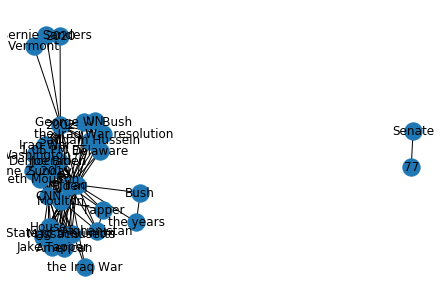

In [83]:
nx.draw(net, with_labels=True)

In [85]:
pd.Series(nx.betweenness_centrality(net)).sort_values(ascending=False)

Iraq                       0.237374
2002                       0.190657
Biden                      0.159722
Moulton                    0.080808
CNN                        0.034091
1:05 PM ET                 0.000000
June 2, 2019               0.000000
Washington                 0.000000
Tapper                     0.000000
Joe Biden                  0.000000
Iraq War                   0.000000
Democratic                 0.000000
Seth Moulton               0.000000
Sunday                     0.000000
American                   0.000000
Massachusetts              0.000000
House                      0.000000
Afghanistan                0.000000
State of the Union         0.000000
US                         0.000000
Delaware                   0.000000
the Iraq War resolution    0.000000
George W. Bush             0.000000
Saddam Hussein             0.000000
UN                         0.000000
Senate                     0.000000
77                         0.000000
Bush                       0

In [86]:
pd.Series(nx.closeness_centrality(net)).sort_values(ascending=False)

Iraq                       0.832035
Biden                      0.808923
Moulton                    0.710273
2002                       0.693362
CNN                        0.661846
Seth Moulton               0.582424
Democratic                 0.582424
Joe Biden                  0.582424
Washington                 0.582424
June 2, 2019               0.582424
1:05 PM ET                 0.582424
Iraq War                   0.582424
Sunday                     0.582424
UN                         0.529477
Saddam Hussein             0.529477
George W. Bush             0.529477
the Iraq War resolution    0.529477
Delaware                   0.529477
American                   0.520022
Jake Tapper                0.520022
Massachusetts              0.520022
House                      0.520022
State of the Union         0.520022
US                         0.520022
Tapper                     0.477397
Afghanistan                0.477397
Bush                       0.455019
the years                  0